In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Tree_Species.csv')
dataset

,X,Y,OBJECTID,SiteID,Address,Street,OnStreet,FromStreet,ToStreet,SideOfParcel,...,DiameterAtBreastHeight,GrowSpace,Trunks,Height,Width,TreeCategory,Area,Parks,BotanicalName,CommonName
0,473049.2450,5.362325e+06,1,189,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,81.0,Shrub bed,0.0,0.0,0.0,Park Trees,Fairfield,BEACON HILL PARK,Wildlife snag,Wildlife snag
1,473054.9248,5.362394e+06,3,222,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,48.0,Turf,1.0,16.0,1.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
2,473025.5742,5.362326e+06,4,258,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,55.0,Turf,1.0,24.0,8.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
3,472875.7893,5.362401e+06,5,281,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,40.0,Shrub bed,1.0,7.0,2.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
4,472991.8027,5.362416e+06,6,315,100,DALLAS RD,DALLAS RD,COOK ST,DOUGLAS ST,NaN,...,60.0,Shrub bed,1.0,4.0,1.0,Park Trees,James Bay,BEACON HILL PARK,Wildlife snag,Wildlife snag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33746,476022.5779,5.362660e+06,35206,36380,417,QUEEN ANNE HTS,QUEEN ANNE HTS,FAIRFIELD RD,DEAD END,Front,...,11.0,Turf,1.0,5.0,3.0,Setback Trees,Gonzales,NaN,Cornus,Dogwood
33747,473285.6790,5.362831e+06,35207,36382,905,CONVENT PL,CONVENT PL,QUADRA ST,VANCOUVER ST,Front,...,6.0,Turf,1.0,3.0,1.0,Boulevard Tree,Fairfield,NaN,Parrotia,Persian ironwood
33748,473273.8125,5.362839e+06,35208,36383,903,CONVENT PL,CONVENT PL,QUADRA ST,VANCOUVER ST,Front,...,6.0,Turf,1.0,3.0,1.0,Boulevard Tree,Fairfield,NaN,Parrotia,Persian ironwood
33749,473266.1109,5.362848e+06,35209,36384,901,CONVENT PL,CONVENT PL,QUADRA ST,VANCOUVER ST,Front,...,6.0,Turf,1.0,3.0,1.0,Boulevard Tree,Fairfield,NaN,Parrotia,Persian ironwood


In [ ]:
dataset = dataset.iloc[:, [11, 14, 15, 16, 17]]
dataset

,Species,Trunks,Height,Width,TreeCategory
0,Wildlife snag,0.0,0.0,0.0,Park Trees
1,Wildlife snag,1.0,16.0,1.0,Park Trees
2,Wildlife snag,1.0,24.0,8.0,Park Trees
3,Wildlife snag,1.0,7.0,2.0,Park Trees
4,Wildlife snag,1.0,4.0,1.0,Park Trees
...,...,...,...,...,...
33746,Cornus species,1.0,5.0,3.0,Setback Trees
33747,Parrotia persica 'Ruby Vase',1.0,3.0,1.0,Boulevard Tree
33748,Parrotia persica 'Ruby Vase',1.0,3.0,1.0,Boulevard Tree
33749,Parrotia persica 'Ruby Vase',1.0,3.0,1.0,Boulevard Tree


In [ ]:
dataset = dataset.dropna()
dataset

,Species,Trunks,Height,Width,TreeCategory
0,Wildlife snag,0.0,0.0,0.0,Park Trees
1,Wildlife snag,1.0,16.0,1.0,Park Trees
2,Wildlife snag,1.0,24.0,8.0,Park Trees
3,Wildlife snag,1.0,7.0,2.0,Park Trees
4,Wildlife snag,1.0,4.0,1.0,Park Trees
...,...,...,...,...,...
33746,Cornus species,1.0,5.0,3.0,Setback Trees
33747,Parrotia persica 'Ruby Vase',1.0,3.0,1.0,Boulevard Tree
33748,Parrotia persica 'Ruby Vase',1.0,3.0,1.0,Boulevard Tree
33749,Parrotia persica 'Ruby Vase',1.0,3.0,1.0,Boulevard Tree


In [ ]:
X = dataset.iloc[:, [2, 3]].values

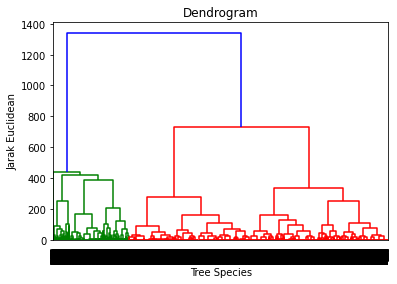

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Tree Species')
plt.ylabel('Jarak Euclidean')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

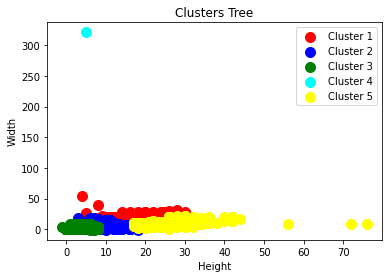

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.title('Clusters Tree')
plt.xlabel('Height')
plt.ylabel('Width')
plt.legend()
plt.show()

In [ ]:
dataset = dataset.head(1000)
dataset

,Species,Trunks,Height,Width,TreeCategory
0,Wildlife snag,0.0,0.0,0.0,Park Trees
1,Wildlife snag,1.0,16.0,1.0,Park Trees
2,Wildlife snag,1.0,24.0,8.0,Park Trees
3,Wildlife snag,1.0,7.0,2.0,Park Trees
4,Wildlife snag,1.0,4.0,1.0,Park Trees
...,...,...,...,...,...
995,Pinus ponderosa,1.0,5.0,4.0,Park Trees
996,Pinus ponderosa,1.0,10.0,5.0,Park Trees
997,Quercus garryana,1.0,4.0,1.0,Park Trees
998,Pinus ponderosa,1.0,7.0,5.0,Park Trees


In [ ]:
dataset = dataset.dropna()
dataset

,Species,Trunks,Height,Width,TreeCategory
0,Wildlife snag,0.0,0.0,0.0,Park Trees
1,Wildlife snag,1.0,16.0,1.0,Park Trees
2,Wildlife snag,1.0,24.0,8.0,Park Trees
3,Wildlife snag,1.0,7.0,2.0,Park Trees
4,Wildlife snag,1.0,4.0,1.0,Park Trees
...,...,...,...,...,...
995,Pinus ponderosa,1.0,5.0,4.0,Park Trees
996,Pinus ponderosa,1.0,10.0,5.0,Park Trees
997,Quercus garryana,1.0,4.0,1.0,Park Trees
998,Pinus ponderosa,1.0,7.0,5.0,Park Trees


In [ ]:
Y = dataset.iloc[:, [2, 3]].values

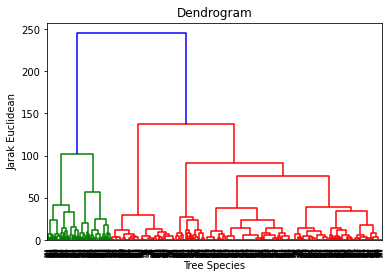

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Tree Species')
plt.ylabel('Jarak Euclidean')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Y)

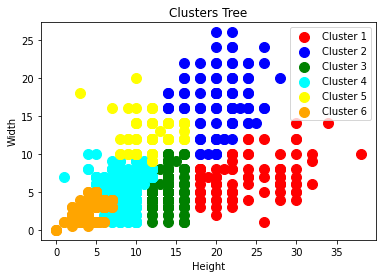

In [ ]:
plt.scatter(Y[y_hc == 0, 0], Y[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_hc == 1, 0], Y[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_hc == 2, 0], Y[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_hc == 3, 0], Y[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Y[y_hc == 4, 0], Y[y_hc == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(Y[y_hc == 5, 0], Y[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.title('Clusters Tree')
plt.xlabel('Height')
plt.ylabel('Width')
plt.legend()
plt.show()